In [1]:
from utils.data_loader import DataLoader
from utils.data_analyzer import DataAnalyzer
from utils.classifier_evaluator import ClassifierEvaluator
import pandas as pd
from sklearn.metrics import roc_auc_score, classification_report
from imblearn.over_sampling import SMOTE

In [2]:
loader = DataLoader()
loader.load_csv('data/schizophrenia_dataset.csv')
loader.watch_data_head()

2025-02-27 19:15:25,377 - INFO - Данные успешно загружены из файла: data/schizophrenia_dataset.csv
2025-02-27 19:15:25,380 - INFO - Первые 5 строк данных:
   Hasta_ID  Yaş  Cinsiyet  Eğitim_Seviyesi  Medeni_Durum  Meslek  \
0         1   72         1                4             2       0   
1         2   49         1                5             2       2   
2         3   53         1                5             3       2   
3         4   67         1                3             2       0   
4         5   54         0                1             2       0   

   Gelir_Düzeyi  Yaşadığı_Yer  Tanı  Hastalık_Süresi  Hastaneye_Yatış_Sayısı  \
0             2             1     0                0                       0   
1             1             0     1               35                       1   
2             1             0     1               32                       0   
3             2             0     0                0                       0   
4             2             1 

In [3]:
loader.data.rename(columns={
    'Hasta_ID': 'Id',
    'Yaş': 'Age',
    'Cinsiyet': 'Gender',
    'Eğitim_Seviyesi': 'Education_Level',
    'Medeni_Durum': 'Martial_Statuts',
    'Meslek': 'Occupation',
    'Gelir_Düzeyi': 'Income_level',
    'Yaşadığı_Yer': 'Live_Area',
    'Tanı': 'Diagnosis',
    'Hastalık_Süresi': 'Disease_Duration',
    'Hastaneye_Yatış_Sayısı': 'Hospitalizations',
    'Ailede_Şizofreni_Öyküsü': 'Family_History',
    'Madde_Kullanımı': 'Substance_Use',
    'İntihar_Girişimi': 'Suicide_Attempts',
    'Pozitif_Semptom_Skoru': 'Positive_Symptoms_Score',
    'Negatif_Semptom_Skoru': 'Negative_Symptoms_Score',
    'GAF_Skoru': 'Global_Assessment_of_Functioning_Score',
    'Sosyal_Destek': 'Social_Support',
    'Stres_Faktörleri': 'Stress_Factors',
    'İlaç_Uyumu': 'Adherence_to_Medication'
}, inplace=True)

loader.watch_data_head()

2025-02-27 19:15:25,866 - INFO - Первые 5 строк данных:
   Id  Age  Gender  Education_Level  Martial_Statuts  Occupation  \
0   1   72       1                4                2           0   
1   2   49       1                5                2           2   
2   3   53       1                5                3           2   
3   4   67       1                3                2           0   
4   5   54       0                1                2           0   

   Income_level  Live_Area  Diagnosis  Disease_Duration  Hospitalizations  \
0             2          1          0                 0                 0   
1             1          0          1                35                 1   
2             1          0          1                32                 0   
3             2          0          0                 0                 0   
4             2          1          0                 0                 0   

   Family_History  Substance_Use  Suicide_Attempts  Positive_Symptoms_Sc

In [4]:
loader.count_missing_values()

2025-02-27 19:15:26,795 - INFO - Количество пропущенных значений в каждом столбце:
2025-02-27 19:15:26,796 - INFO - 
Id                                        0
Age                                       0
Gender                                    0
Education_Level                           0
Martial_Statuts                           0
Occupation                                0
Income_level                              0
Live_Area                                 0
Diagnosis                                 0
Disease_Duration                          0
Hospitalizations                          0
Family_History                            0
Substance_Use                             0
Suicide_Attempts                          0
Positive_Symptoms_Score                   0
Negative_Symptoms_Score                   0
Global_Assessment_of_Functioning_Score    0
Social_Support                            0
Stress_Factors                            0
Adherence_to_Medication                   0
dty

In [5]:
analyzer = DataAnalyzer(loader.data)
analyzer.dataset_head_info()

2025-02-27 19:15:27,523 - INFO - Размер датасета: (10000, 20)
2025-02-27 19:15:27,524 - INFO - Типы данных в каждом столбце:
Id                                        int64
Age                                       int64
Gender                                    int64
Education_Level                           int64
Martial_Statuts                           int64
Occupation                                int64
Income_level                              int64
Live_Area                                 int64
Diagnosis                                 int64
Disease_Duration                          int64
Hospitalizations                          int64
Family_History                            int64
Substance_Use                             int64
Suicide_Attempts                          int64
Positive_Symptoms_Score                   int64
Negative_Symptoms_Score                   int64
Global_Assessment_of_Functioning_Score    int64
Social_Support                            int64
Stress_Fact

In [6]:
analyzer.statistical_summary()

2025-02-27 19:15:28,444 - INFO - Основные статистики для числовых столбцов:
                Id           Age        Gender  Education_Level  \
count  10000.00000  10000.000000  10000.000000     10000.000000   
mean    5000.50000     48.867700      0.502600         3.042600   
std     2886.89568     18.215054      0.500018         1.423021   
min        1.00000     18.000000      0.000000         1.000000   
25%     2500.75000     33.000000      0.000000         2.000000   
50%     5000.50000     49.000000      1.000000         3.000000   
75%     7500.25000     65.000000      1.000000         4.000000   
max    10000.00000     80.000000      1.000000         5.000000   

       Martial_Statuts    Occupation  Income_level     Live_Area  \
count     10000.000000  10000.000000  10000.000000  10000.000000   
mean          1.518200      1.510600      0.996900      0.499400   
std           1.117315      1.114097      0.817531      0.500025   
min           0.000000      0.000000      0.0000

In [7]:
loader.data.drop(columns=['Id', 'Disease_Duration', 'Hospitalizations'], inplace=True)

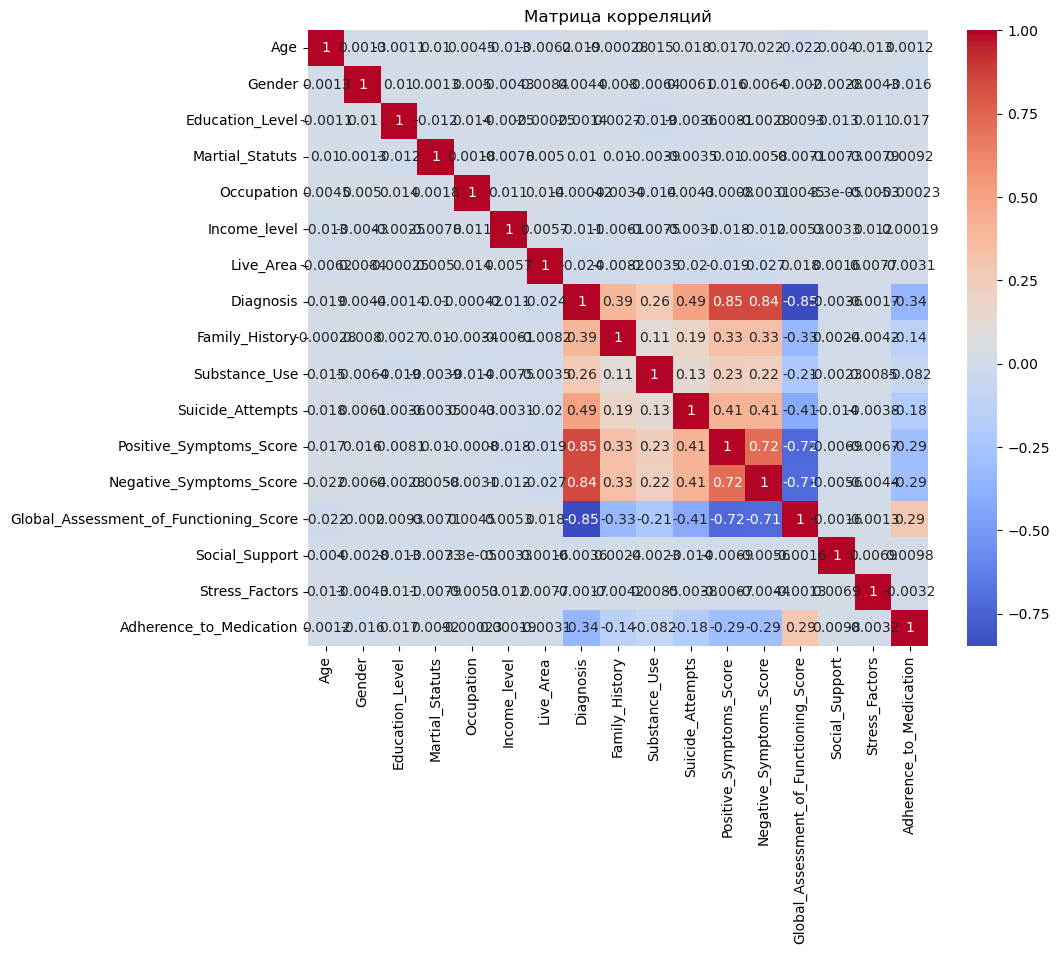

In [8]:
analyzer = DataAnalyzer(loader.data)
analyzer.correlation_analysis()

In [9]:
# loader.data.drop(columns=['Stress_Factors', 'Social_Support', 'Gender', 'Martial_Statuts', 'Occupation', 'Live_Area', 'Age', 'Education_Level', 'Income_level'], inplace=True)
# analyzer = DataAnalyzer(loader.data)
# analyzer.correlation_analysis()

In [10]:
analyzer.detect_outliers()

2025-02-27 19:15:33,284 - INFO - Количество выбросов в каждом столбце:
Age                                         0
Gender                                      0
Education_Level                             0
Martial_Statuts                             0
Occupation                                  0
Income_level                                0
Live_Area                                   0
Diagnosis                                   0
Family_History                              0
Substance_Use                               0
Suicide_Attempts                          884
Positive_Symptoms_Score                     0
Negative_Symptoms_Score                     0
Global_Assessment_of_Functioning_Score      0
Social_Support                              0
Stress_Factors                              0
Adherence_to_Medication                     0
dtype: int64


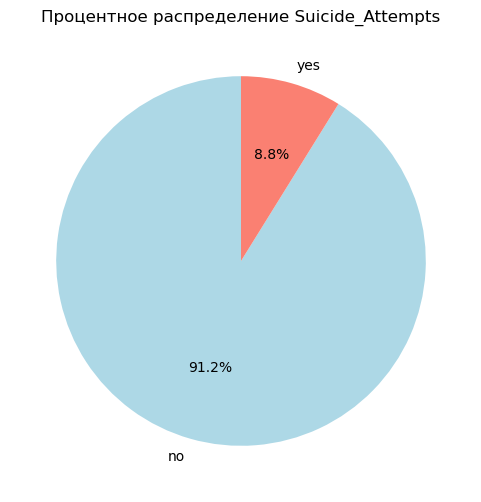

In [11]:
import matplotlib.pyplot as plt

# Подсчитаем количество уникальных значений
counts = loader.data['Suicide_Attempts'].value_counts()

# Метки для диаграммы
labels = ['no', 'yes']

# Построение круговой диаграммы
plt.figure(figsize=(6, 6))
plt.pie(
    counts, 
    labels=labels, 
    autopct='%1.1f%%',  # Формат отображения процентов
    startangle=90,      # Начальный угол
    colors=['lightblue', 'salmon']  # Цвета для категорий
)
plt.title('Процентное распределение Suicide_Attempts')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

X = loader.data.drop('Diagnosis', axis=1)
y = loader.data['Diagnosis']

# Разделение на обучающую, валидационную и тестовую выборки
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Балансировка данных с помощью SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Кросс-валидация и базовая модель
model = GradientBoostingClassifier()
scores = cross_val_score(model, X_train_balanced, y_train_balanced, cv=5, scoring='roc_auc')
print(f"Средний ROC-AUC на кросс-валидации: {np.mean(scores):.4f}")

# evaluator = ClassifierEvaluator(X, y)

Средний ROC-AUC на кросс-валидации: 1.0000


In [13]:
!pip install optuna
!pip install optuna-integration[sklearn]

In [14]:
import optuna
from optuna.integration import OptunaSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Оптимизация гиперпараметров для GradientBoostingClassifier
param_grid = {
    "n_estimators": optuna.distributions.IntDistribution(100, 300),
    "max_depth": optuna.distributions.IntDistribution(3, 7),
    "learning_rate": optuna.distributions.FloatDistribution(0.01, 0.1, log=True),  # Исправлено
}

optuna_search = OptunaSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_distributions=param_grid,
    cv=3,
    scoring="roc_auc",
    n_jobs=-1,
    random_state=42,
    verbose=2,
)

optuna_search.fit(X_train_balanced, y_train_balanced)
print(f"Лучшие параметры: {optuna_search.best_params_}")

# # Настройка гиперпараметров с помощью GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [3, 5],
#     'learning_rate': [0.01, 0.1]
# }
# grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
# grid_search.fit(X_train_balanced, y_train_balanced)

# print(f"Лучшие параметры: {grid_search.best_params_}")
# print(f"ROC-AUC на валидационной выборке: {roc_auc_score(y_val, grid_search.predict_proba(X_val)[:, 1]):.4f}")

/tmp/ipykernel_75369/3249227899.py:12: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = OptunaSearchCV(
[I 2025-02-27 19:15:38,268] A new study created in memory with name: no-name-8049ec34-9235-4a11-93ba-4e32e2575a36
2025-02-27 19:15:38,269 - INFO - Searching the best hyperparameters using 9958 samples...
[I 2025-02-27 19:15:41,508] Trial 9 finished with value: 1.0 and parameters: {'n_estimators': 105, 'max_depth': 7, 'learning_rate': 0.05263320471045581}. Best is trial 9 with value: 1.0.
[I 2025-02-27 19:15:42,268] Trial 2 finished with value: 1.0 and parameters: {'n_estimators': 141, 'max_depth': 6, 'learning_rate': 0.05279233447537863}. Best is trial 9 with value: 1.0.
[I 2025-02-27 19:15:42,442] Trial 1 finished with value: 1.0 and parameters: {'n_estimators': 149, 'max_depth': 3, 'learning_rate': 0.03404655994967235}. Best is trial 9 with value: 1.0.
[I 2025-02-27 19:15:42,497] Trial 7 finished

Лучшие параметры: {'n_estimators': 105, 'max_depth': 7, 'learning_rate': 0.05263320471045581}


ROC-AUC на тестовой выборке: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1067
           1       1.00      1.00      1.00       433

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



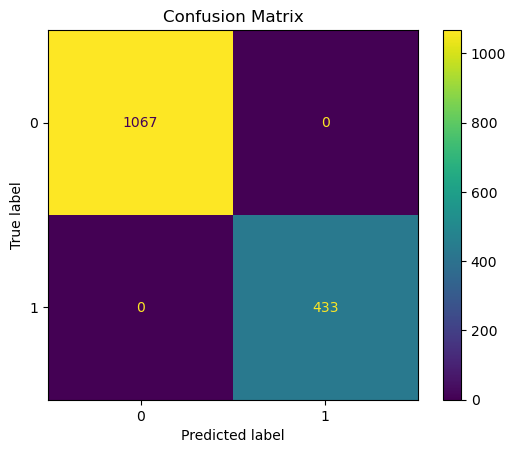

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
# Оценка финальной модели
final_model = optuna_search.best_estimator_
y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)[:, 1]

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC на тестовой выборке: {roc_auc:.4f}")

# Classification report
print(classification_report(y_test, y_pred))

# Матрица ошибок
ConfusionMatrixDisplay.from_estimator(final_model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

In [17]:
# Добавляем целевую переменную в данные для проверки корреляции
data_with_target = X.copy()
data_with_target['Target'] = y

# Считаем корреляцию
correlation_matrix = data_with_target.corr()
print(correlation_matrix['Target'].sort_values(ascending=False))

Target                                    1.000000
Positive_Symptoms_Score                   0.846972
Negative_Symptoms_Score                   0.843931
Suicide_Attempts                          0.488795
Family_History                            0.390557
Substance_Use                             0.264959
Age                                       0.019215
Martial_Statuts                           0.010262
Gender                                    0.004411
Occupation                               -0.000416
Education_Level                          -0.001394
Stress_Factors                           -0.001687
Social_Support                           -0.003621
Income_level                             -0.010541
Live_Area                                -0.023730
Adherence_to_Medication                  -0.340134
Global_Assessment_of_Functioning_Score   -0.847212
Name: Target, dtype: float64


In [18]:
# Удаление признаков с высокой корреляцией с Target
X = X.drop(columns=['Positive_Symptoms_Score', 'Negative_Symptoms_Score', 'Global_Assessment_of_Functioning_Score'])

# Балансировка данных
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Кросс-валидация
model = GradientBoostingClassifier()
scores = cross_val_score(model, X_train_balanced, y_train_balanced, cv=5, scoring='roc_auc')
print(f"Средний ROC-AUC на кросс-валидации: {np.mean(scores):.4f}")

# Настройка гиперпараметров
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

# Оценка финальной модели
final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)[:, 1]

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC на тестовой выборке: {roc_auc:.4f}")

# Classification report
print(classification_report(y_test, y_pred))

Средний ROC-AUC на кросс-валидации: 1.0000
ROC-AUC на тестовой выборке: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1067
           1       1.00      1.00      1.00       433

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [19]:
# Проверяем индексы
print(X.index.is_unique)

True


In [20]:
# Проверка на дубликаты между обучающей и тестовой выборками
duplicates = pd.merge(X_train, X_test, how='inner')
print(f"Количество дубликатов между обучающей и тестовой выборками: {len(duplicates)}")

Количество дубликатов между обучающей и тестовой выборками: 0


In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

for column in X.columns:
    model = GradientBoostingClassifier(random_state=42)
    model.fit(X_train[[column]], y_train)
    y_pred_proba = model.predict_proba(X_test[[column]])[:, 1]
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"Признак: {column}, ROC-AUC: {roc_auc:.4f}")

Признак: Age, ROC-AUC: 0.5056
Признак: Gender, ROC-AUC: 0.4809
Признак: Education_Level, ROC-AUC: 0.4747
Признак: Martial_Statuts, ROC-AUC: 0.4724
Признак: Occupation, ROC-AUC: 0.5198
Признак: Income_level, ROC-AUC: 0.4992
Признак: Live_Area, ROC-AUC: 0.5121
Признак: Family_History, ROC-AUC: 0.7190
Признак: Substance_Use, ROC-AUC: 0.6301
Признак: Suicide_Attempts, ROC-AUC: 0.6709
Признак: Social_Support, ROC-AUC: 0.4988
Признак: Stress_Factors, ROC-AUC: 0.5027
Признак: Adherence_to_Medication, ROC-AUC: 0.7140


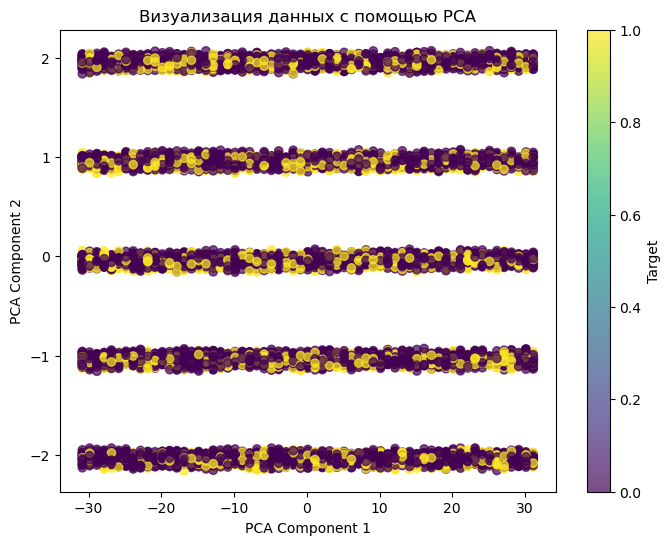

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Преобразование признаков в 2D-пространство
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(label='Target')
plt.title('Визуализация данных с помощью PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42, class_weight='balanced')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC для логистической регрессии: {roc_auc:.4f}")

ROC-AUC для логистической регрессии: 1.0000


In [25]:
# Добавление случайного шума
noise = np.random.normal(0, 0.01, X_train.shape)  # Шум должен быть того же размера, что и X_train
X_noisy = X_train + noise

# Балансировка со SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_noisy, y_train)

# Обучение модели
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

model = GradientBoostingClassifier(random_state=42)
scores = cross_val_score(model, X_train_balanced, y_train_balanced, cv=5, scoring='roc_auc')
print(f"Средний ROC-AUC на кросс-валидации: {np.mean(scores):.4f}")

Средний ROC-AUC на кросс-валидации: 1.0000


In [26]:
y_filtered = y.iloc[X_noisy.index]
correlations_with_target = X_noisy.corrwith(y_filtered)
print(correlations_with_target)

Age                                       0.024169
Gender                                    0.009175
Education_Level                          -0.000732
Martial_Statuts                           0.010774
Occupation                               -0.002837
Income_level                             -0.018477
Live_Area                                -0.017454
Family_History                            0.379707
Substance_Use                             0.263676
Suicide_Attempts                          0.482571
Positive_Symptoms_Score                   0.850314
Negative_Symptoms_Score                   0.846522
Global_Assessment_of_Functioning_Score   -0.847272
Social_Support                           -0.000312
Stress_Factors                            0.011419
Adherence_to_Medication                  -0.343219
dtype: float64


In [27]:
from sklearn.ensemble import GradientBoostingClassifier

X_filtered = X_noisy.drop(columns=['Positive_Symptoms_Score', 'Negative_Symptoms_Score', 'Global_Assessment_of_Functioning_Score'])
y_filtered = y.iloc[X_filtered.index]


print(f"Размеры X_filtered: {X_filtered.shape}")
print(f"Размеры y_filtered: {y_filtered.shape}")
# Обучение модели с оставшимися признаками
# Создание модели
model = GradientBoostingClassifier(random_state=42)

# Кросс-валидация
scores = cross_val_score(model, X_filtered, y_filtered, cv=5, scoring='roc_auc')

# Вывод результата
print(f"Средний ROC-AUC на кросс-валидации (без подозрительных признаков): {np.mean(scores):.4f}")

Размеры X_filtered: (7000, 13)
Размеры y_filtered: (7000,)
Средний ROC-AUC на кросс-валидации (без подозрительных признаков): 0.8658


In [28]:
correlations_with_target = X_filtered.corrwith(y_filtered)
print(correlations_with_target)

Age                        0.024169
Gender                     0.009175
Education_Level           -0.000732
Martial_Statuts            0.010774
Occupation                -0.002837
Income_level              -0.018477
Live_Area                 -0.017454
Family_History             0.379707
Substance_Use              0.263676
Suicide_Attempts           0.482571
Social_Support            -0.000312
Stress_Factors             0.011419
Adherence_to_Medication   -0.343219
dtype: float64


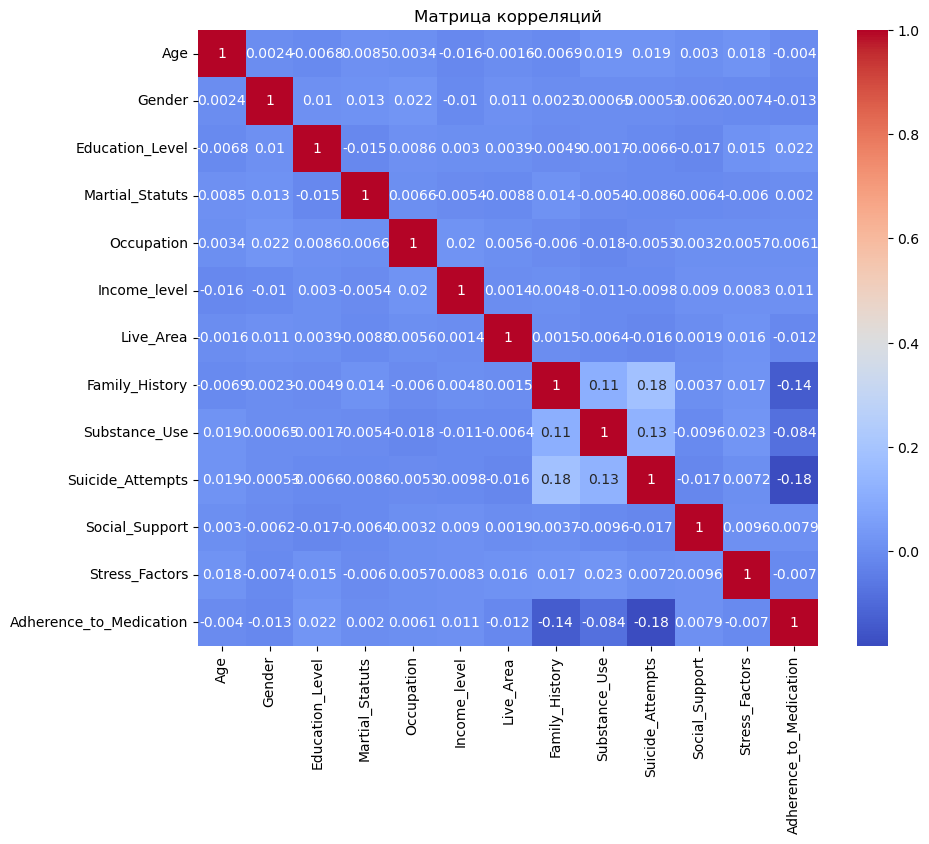

In [29]:
analyzer = DataAnalyzer(X_filtered)
analyzer.correlation_analysis()



2025-02-27 19:20:58,196 - INFO - Начало оценки переданных классификаторов...
2025-02-27 19:20:58,197 - INFO - Оценка классификатора: Gradient Boosting


Результаты для классификатора Gradient Boosting:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       992
           1       0.77      0.60      0.67       408

    accuracy                           0.83      1400
   macro avg       0.81      0.76      0.78      1400
weighted avg       0.83      0.83      0.82      1400

Accuracy: 83.14%


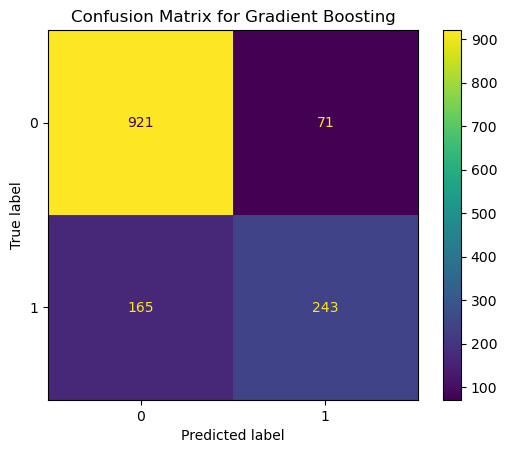

2025-02-27 19:21:05,321 - INFO - Gradient Boosting - Accuracy: 0.8314, F1: 0.8243, Precision: 0.8264, Recall: 0.8314
2025-02-27 19:21:05,322 - INFO - Оценка классификатора: CatBoost


Результаты для классификатора CatBoost:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       992
           1       0.77      0.59      0.67       408

    accuracy                           0.83      1400
   macro avg       0.81      0.76      0.78      1400
weighted avg       0.82      0.83      0.82      1400

Accuracy: 82.93%


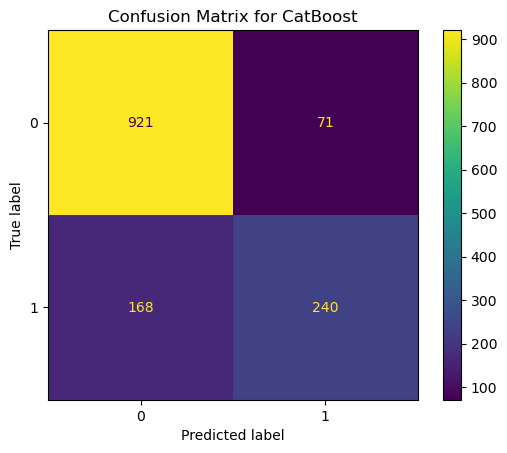

2025-02-27 19:21:07,499 - INFO - CatBoost - Accuracy: 0.8293, F1: 0.8217, Precision: 0.8242, Recall: 0.8293
2025-02-27 19:21:07,500 - INFO - Оценка классификатора: AdaBoost
/home/yana/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Результаты для классификатора AdaBoost:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       992
           1       0.78      0.57      0.66       408

    accuracy                           0.83      1400
   macro avg       0.81      0.75      0.77      1400
weighted avg       0.82      0.83      0.82      1400

Accuracy: 82.64%


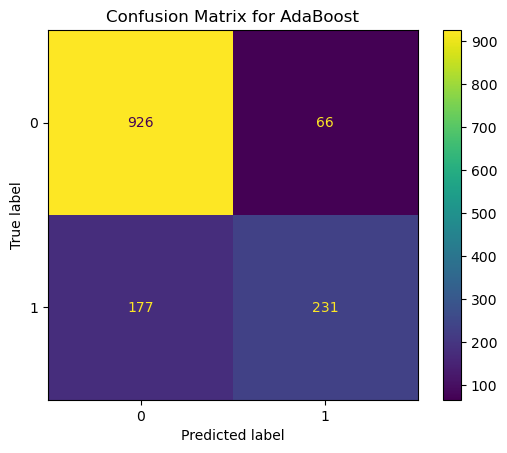

2025-02-27 19:21:08,170 - INFO - AdaBoost - Accuracy: 0.8264, F1: 0.8174, Precision: 0.8215, Recall: 0.8264
2025-02-27 19:21:08,171 - INFO - Оценка классификатора: Extra Trees


Результаты для классификатора Extra Trees:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       992
           1       0.80      0.57      0.67       408

    accuracy                           0.83      1400
   macro avg       0.82      0.76      0.78      1400
weighted avg       0.83      0.83      0.82      1400

Accuracy: 83.43%


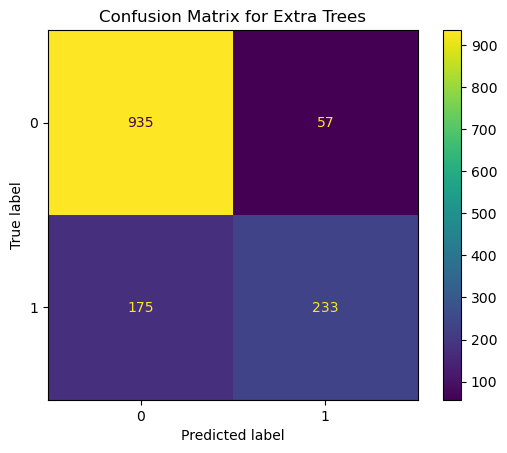

2025-02-27 19:21:08,696 - INFO - Extra Trees - Accuracy: 0.8343, F1: 0.8249, Precision: 0.8310, Recall: 0.8343
2025-02-27 19:21:08,697 - INFO - Оценка классификатора: Quadratic Discriminant Analysis


Результаты для классификатора Quadratic Discriminant Analysis:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       992
           1       0.98      0.36      0.53       408

    accuracy                           0.81      1400
   macro avg       0.89      0.68      0.70      1400
weighted avg       0.85      0.81      0.78      1400

Accuracy: 81.14%


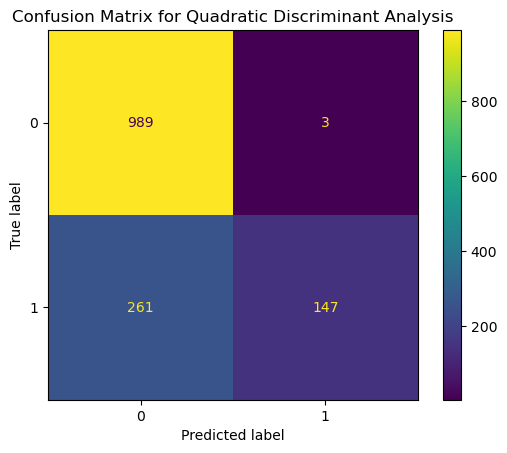

2025-02-27 19:21:08,880 - INFO - Quadratic Discriminant Analysis - Accuracy: 0.8114, F1: 0.7787, Precision: 0.8462, Recall: 0.8114
2025-02-27 19:21:08,880 - INFO - Оценка классификатора: LightGBM


[LightGBM] [Info] Number of positive: 1613, number of negative: 3987
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000820 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.288036 -> initscore=-0.904943
[LightGBM] [Info] Start training from score -0.904943
Результаты для классификатора LightGBM:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       992
           1       0.78      0.59      0.67       408

    accuracy                           0.83      1400
   macro avg       0.81      0.76      0.78      1400
weighted avg       0.83      0.83      0.82      1400

Accuracy: 83.07%


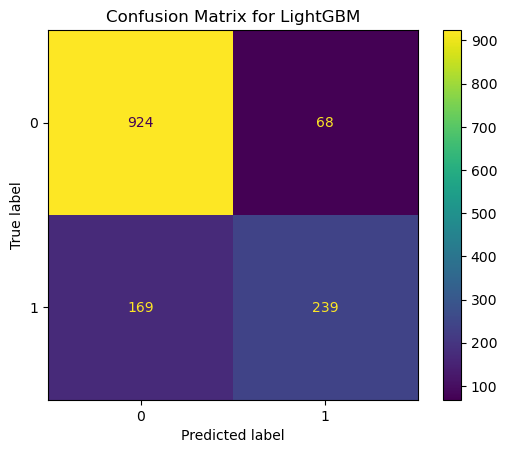

2025-02-27 19:21:09,308 - INFO - LightGBM - Accuracy: 0.8307, F1: 0.8229, Precision: 0.8259, Recall: 0.8307
2025-02-27 19:21:09,309 - INFO - Оценка классификатора: K Neighbors


Результаты для классификатора K Neighbors:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       992
           1       0.57      0.23      0.32       408

    accuracy                           0.73      1400
   macro avg       0.66      0.58      0.58      1400
weighted avg       0.70      0.73      0.68      1400

Accuracy: 72.57%


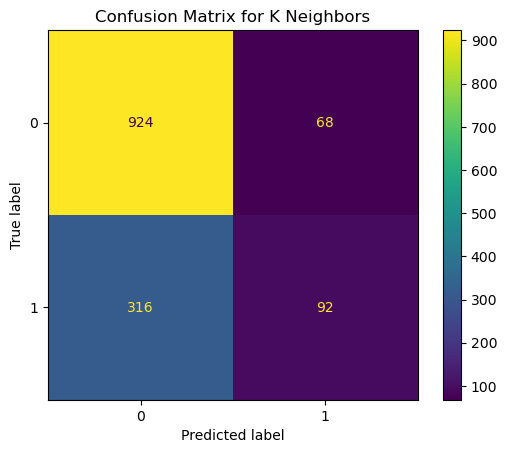

2025-02-27 19:21:09,568 - INFO - K Neighbors - Accuracy: 0.7257, F1: 0.6811, Precision: 0.6956, Recall: 0.7257
2025-02-27 19:21:09,568 - INFO - Оценка классификатора: Decision Tree


Результаты для классификатора Decision Tree:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       992
           1       0.57      0.63      0.60       408

    accuracy                           0.75      1400
   macro avg       0.71      0.72      0.71      1400
weighted avg       0.76      0.75      0.76      1400

Accuracy: 75.43%


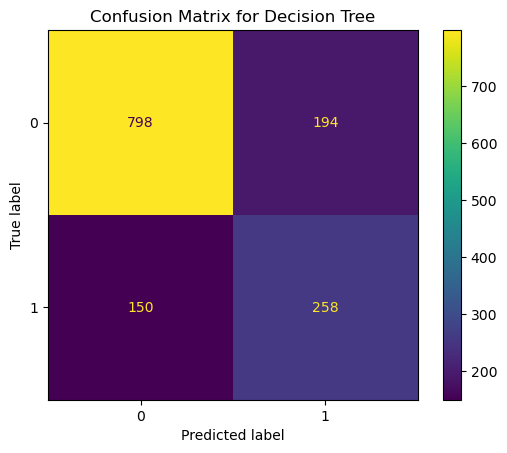

2025-02-27 19:21:09,851 - INFO - Decision Tree - Accuracy: 0.7543, F1: 0.7578, Precision: 0.7628, Recall: 0.7543
2025-02-27 19:21:09,851 - INFO - Оценка классификатора: XGBoost
/home/yana/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:21:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Результаты для классификатора XGBoost:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       992
           1       0.74      0.59      0.65       408

    accuracy                           0.82      1400
   macro avg       0.79      0.75      0.77      1400
weighted avg       0.81      0.82      0.81      1400

Accuracy: 81.86%


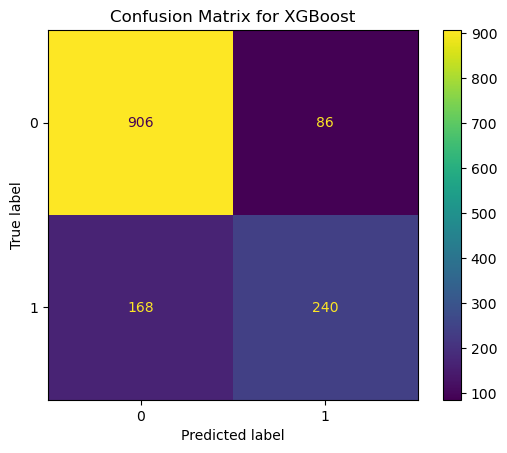

2025-02-27 19:21:10,188 - INFO - XGBoost - Accuracy: 0.8186, F1: 0.8120, Precision: 0.8123, Recall: 0.8186
2025-02-27 19:21:10,189 - INFO - Оценка классификатора: Dummy


Результаты для классификатора Dummy:
              precision    recall  f1-score   support

           0       0.72      0.71      0.72       992
           1       0.32      0.33      0.32       408

    accuracy                           0.60      1400
   macro avg       0.52      0.52      0.52      1400
weighted avg       0.60      0.60      0.60      1400

Accuracy: 60.14%


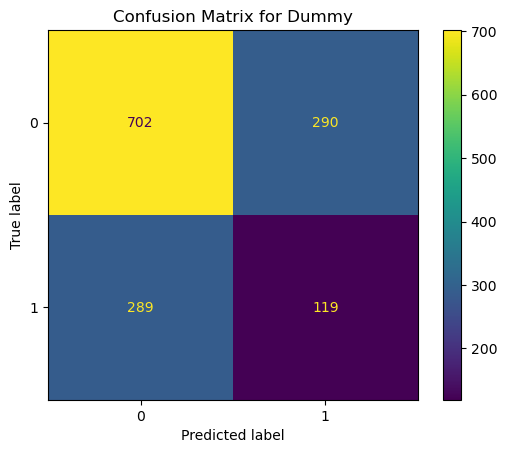

2025-02-27 19:21:10,385 - INFO - Dummy - Accuracy: 0.6014, F1: 0.6026, Precision: 0.6037, Recall: 0.6014
2025-02-27 19:21:10,386 - INFO - Оценка классификатора: SVM (Linear Kernel)


Результаты для классификатора SVM (Linear Kernel):
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       992
           1       0.67      0.75      0.70       408

    accuracy                           0.82      1400
   macro avg       0.78      0.80      0.79      1400
weighted avg       0.82      0.82      0.82      1400

Accuracy: 81.64%


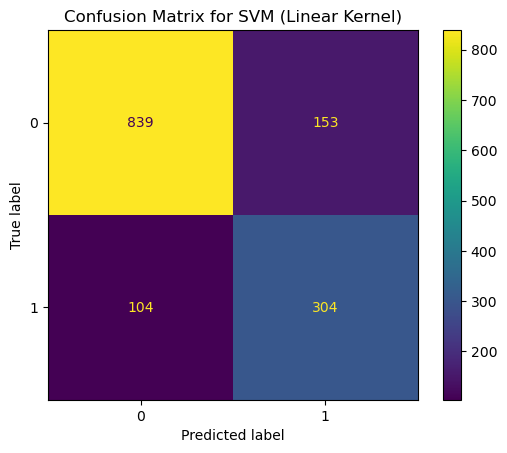

2025-02-27 19:21:13,922 - INFO - SVM (Linear Kernel) - Accuracy: 0.8164, F1: 0.8193, Precision: 0.8243, Recall: 0.8164
2025-02-27 19:21:13,923 - INFO - Оценка классификаторов завершена.


In [30]:
from sklearn.ensemble import (
    GradientBoostingClassifier,
    AdaBoostClassifier,
    ExtraTreesClassifier
)
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Создание объекта для оценки моделей
evaluator = ClassifierEvaluator(X_filtered, y_filtered)

# Оценка отдельных классификаторов
classifiers = [
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=145, max_depth=7, learning_rate=0.0529147789997509)),# Классификатор градиентного бустинга
    ("CatBoost", CatBoostClassifier(verbose=0)),                         # Классификатор CatBoost
    ("AdaBoost", AdaBoostClassifier()),                                  # Классификатор Ada Boost
    ("Extra Trees", ExtraTreesClassifier()),                             # Классификатор Extra Trees
    ("Quadratic Discriminant Analysis", QuadraticDiscriminantAnalysis()),# Квадратичный дискриминантный анализ
    ("LightGBM", LGBMClassifier()),                                      # Light Gradient Boosting Machine
    ("K Neighbors", KNeighborsClassifier()),                             # Классификатор K Neighbors
    ("Decision Tree", DecisionTreeClassifier()),                         # Классификатор дерева решений
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric="logloss")), # Экстремальный градиентный бустинг
    ("Dummy", DummyClassifier(strategy="stratified")),                   # Фиктивный классификатор
    ("SVM (Linear Kernel)", SVC(kernel="linear", class_weight="balanced")) # SVM с линейным ядром
]

evaluator.evaluate(classifiers)

2025-02-27 19:21:25,254 - INFO - Начало оценки переданных классификаторов...
2025-02-27 19:21:25,255 - INFO - Оценка классификатора: Voting (Soft)
/home/yana/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:21:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 1613, number of negative: 3987
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 5600, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.288036 -> initscore=-0.904943
[LightGBM] [Info] Start training from score -0.904943


/home/yana/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Результаты для классификатора Voting (Soft):
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       992
           1       0.78      0.59      0.68       408

    accuracy                           0.83      1400
   macro avg       0.82      0.76      0.78      1400
weighted avg       0.83      0.83      0.83      1400

Accuracy: 83.36%


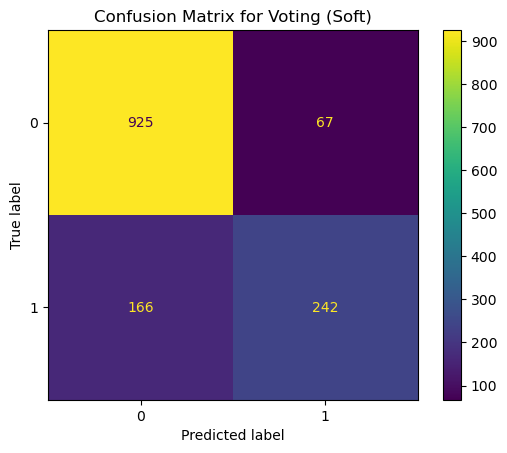

2025-02-27 19:21:35,375 - INFO - Voting (Soft) - Accuracy: 0.8336, F1: 0.8260, Precision: 0.8290, Recall: 0.8336
2025-02-27 19:21:35,376 - INFO - Оценка классификаторов завершена.


In [31]:
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, StackingClassifier

# Оценка ансамбля Voting
voting = VotingClassifier(
    estimators=[
        ("Gradient Boosting", GradientBoostingClassifier(n_estimators=145, max_depth=7, learning_rate=0.0529147789997509
    )),
        ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric="logloss")),
        ("CatBoost", CatBoostClassifier(verbose=0)),
        ("LightGBM", LGBMClassifier()),
        ("AdaBoost", AdaBoostClassifier()), 
    ],
    voting="soft"
)
ensembles = [("Voting (Soft)", voting)]
evaluator.evaluate(ensembles)

2025-02-27 14:41:53,788 - INFO - Начало оценки переданных классификаторов...
2025-02-27 14:41:53,788 - INFO - Оценка классификатора: Stacking
/home/yana/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/yana/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [14:41:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yana/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/yana/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm

[LightGBM] [Info] Number of positive: 1290, number of negative: 3190
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of data points in the train set: 4480, number of used features: 13
[LightGBM] [Info] Number of positive: 1291, number of negative: 3189
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.287946 -> initscore=-0.905379
[LightGBM] [Info] Start training from score -0.905379
[LightGBM] [Info] Number of positive: 1291, number of negative: 3189
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001691 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3315
[LightGBM] [Info] Number of positive: 1290, number of negative: 3190
[LightGBM] [Info] Number of data points in

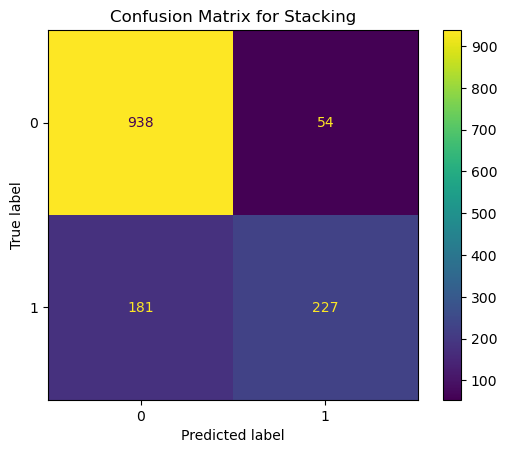

2025-02-27 14:42:01,784 - INFO - Stacking - Accuracy: 0.8321, F1: 0.8217, Precision: 0.8294, Recall: 0.8321
2025-02-27 14:42:01,785 - INFO - Оценка классификаторов завершена.


In [30]:
from sklearn.model_selection import StratifiedKFold

# Пример: Оценка ансамбля Stacking
stacking = StackingClassifier(
    estimators=[
        ("AdaBoost", AdaBoostClassifier()),
        ("LightGBM", LGBMClassifier()),
        ("CatBoost", CatBoostClassifier(verbose=0)),
        ("Quadratic Discriminant Analysis", QuadraticDiscriminantAnalysis()),
        ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric="logloss")),
    ],
    final_estimator=LogisticRegression(random_state=42, max_iter=1000),
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1,
    passthrough=False
)
evaluator.evaluate([("Stacking", stacking)])


In [32]:
evaluator.get_best_classifier(metric="Accuracy")

2025-02-27 19:21:39,259 - INFO - Лучшие классификаторы по метрике Accuracy:
2025-02-27 19:21:39,262 - INFO - 
    Classifier  Accuracy  F1 Score  Precision    Recall
3  Extra Trees  0.834286   0.82493   0.831008  0.834286
